# ORIE 5355/INFO 5370 HW 3: Algorithmic Pricing

 - Name: Horizon Hou
 - Net-id: rh553
 - Date: 10/17/2022
 - Late days used for this assignment: 0
 - Total late days used (counting this assignment): 1
 - People with whom you discussed this assignment: 

After you finish the homework, please complete the following (short, anonymous) post-homework survey: https://forms.gle/N2hdk8B4r7TF1RDG6 and include the survey completion code below.

### Question 0 [1 point]
<font color='blue'> Survey completion code: hw3_2021xyz

We have marked questions in <font color='blue'> blue </font>. Please put answers in black (do not change colors). You'll want to write text answers in "markdown" mode instead of code. In Jupyter notebook, you can go to Cell > Cell Type > Markdown, from the menu. Please carefully read the late days policy and grading procedure [here](https://orie5355.github.io/Fall_2021/assignments/). 

# Conceptual component [4 points]

Please complete the following pricing ethics scenario questionaire: https://forms.gle/dLq7mC32ft1NrhK69, and include the survey completion code below. **We will discuss these issues in class most likely on 10/5 (Exact date to be announced). You must complete the questionaire before the day of that class, even if you turn in the rest of the homework later. The questionaire will close the morning of the class that we discuss these issues.**

<font color='blue'> Survey completion code: 

hw3_pricingethics_2021

<font color='blue'> Survey completion code: Based on the first letter of your first name, explain your answers to the following questions, in at most three sentences each.

First letter A-C: 1, 6, 11, 16

First letter D-H: 2, 7, 12, 17

First letter I-M: 3, 8, 13, 18

First letter N-S: 4, 9, 14, 19

First letter T-Z: 5, 10, 15, 20


<font color='blue'> Be prepared to discuss your answers to at least these questions in class (I might randomly call on people), but you should also be willing/able to discuss your answers to other questions. 

2. A convenience store has been selling umbrellas for 5. Whenever it starts raining, the store raises the price to 8.

I believe this is completely fair because when the weather is rainy, the demand curve for umbrella shift to the right. While supply remains the same, the price equilibrium increases. So it is completely fair for convenience store to raise the price of umbrella to the new equilibrium.

7. A small factory produces tables and sells all that it can make at 200 each. Because of changes in the price of materials, the cost of making each table has recently decreased by 40. The factory reduces its price for the tables by only 20. 

I believe this is acceptable, because the decrease of cost is on the same material, and the quality of the table remains the same. The small factory do decrease the price by 20, which makes the benefit from cheaper material is shared half and half by the factory and the customers. I believe it is accepatble to split the benefit by half.

12. A business in a community with high unemployment needs to hire a new computer programmer. Four candidates are judged to be completely qualified for the job. The manager asks the candidates to state the lowest salary they would be willing to accept, and then hires the one who demands the lowest salary. *

I believe this is unfair, because salary negotiation should be fair, and based on each side's interest. However, asking candidates to provide lowest salary and compare between those candidates generate unbalanced information between candidates and the company, and it acts like the company is treating candidates as commodities, which is unfair.

17. On Uber/Lyft, drivers have to drive longer to pick up the passengers in certain suburbs or neighborhoods,  because they tend to be farther away. Is it acceptable for them to charge more to passengers from these neighborhoods? *

I believe this is acceptable, because the cost for those drivers to pick up passengers in certain suburbs or neighborhoods is higher, so it is accepatable to charge more. However, the price should only be increased if there is no available cars nearby. If there is available cars nearby, it is not fair to ask more money only based on the physical location of the neighborhood.

# Programming component

## Helper code

In [1]:
import numpy as np
import pandas as pd
import os, sys, math
import matplotlib.pyplot as plt

In [396]:
df_train = pd.read_csv('HW3_data_train.csv')
test_demand_curve = pd.read_csv('test_demand.csv')

In [3]:
df_train.head()

,Location,Income,Offered price,Purchased
0,Africa,10.38,3.16,False
1,Europe,26.33,3.47,True
2,Europe,24.06,3.78,True
3,Africa,16.18,3.74,False
4,Asia Pacific,13.73,4.75,False


In [4]:
df_train.shape, test_demand_curve.shape

((4000, 4), (199, 5))

## Problem 1: Demand estimation and pricing without covariates

First, we will use the training data to construct estimates of the demand at each price without leveraging the covariates, and then use that estimated function to calculate optimal prices. 

### 1a) Naive method: empirical estimate of demand $d(p)$ at each price

<font color='blue'> Fill in the below function, that takes in a dataframe and the number of bins into which to separate the historical prices. The function should output a dataframe that has one row for each price bin, with two columns: the bin interval, and the estimated demand $d(p)$ (the fraction of potential customers who purchase at price $p$) in that bin.  
    
Use the following function to create bins:
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.qcut.html

In [5]:
# Example with 10 bins:
df_train['bin_with_10_bins'] = pd.qcut(df_train['Offered price'], 10)
df_train.head()

,Location,Income,Offered price,Purchased,bin_with_10_bins
0,Africa,10.38,3.16,False,"(2.95, 3.54]"
1,Europe,26.33,3.47,True,"(2.95, 3.54]"
2,Europe,24.06,3.78,True,"(3.54, 4.19]"
3,Africa,16.18,3.74,False,"(3.54, 4.19]"
4,Asia Pacific,13.73,4.75,False,"(4.19, 4.77]"


For example, with 2 bins and passing in df_train to the function, you should see the following output:

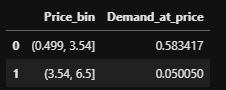

In [37]:
def create_empirical_estimate_demand_df(df, number_of_pricing_bins):
    df_train_bins = df.copy()
    my_bins = str('bin_with_'+str(number_of_pricing_bins)+'_bins')
    df_train_bins[my_bins] = pd.qcut(df_train['Offered price'], number_of_pricing_bins)
    df_train_bins['Purchased_numeric'] = np.where(df_train_bins['Purchased']==True, 1, 0)
    my_demand = df_train_bins.groupby(my_bins).sum()['Purchased_numeric']/df_train_bins.groupby(my_bins).count()['Purchased_numeric']
    my_demand = pd.DataFrame(my_demand)
    my_demand = my_demand.reset_index()
    my_demand.columns = ['Price_bin','Demand_at_price']
    
    return my_demand

In [38]:
df_train.groupby('bin_with_10_bins').sum()['Purchased']/df_train.groupby('bin_with_10_bins').count()['Purchased']

bin_with_10_bins
(0.499, 1.05]    0.931373
(1.05, 1.66]     0.795970
(1.66, 2.29]     0.591584
(2.29, 2.95]     0.398477
(2.95, 3.54]     0.190476
(3.54, 4.19]     0.115000
(4.19, 4.77]     0.054591
(4.77, 5.36]     0.050505
(5.36, 5.91]     0.024691
(5.91, 6.5]      0.005076
Name: Purchased, dtype: float64

In [39]:
create_empirical_estimate_demand_df(df_train, 10)

,Price_bin,Demand_at_price
0,"(0.499, 1.05]",0.931373
1,"(1.05, 1.66]",0.795970
2,"(1.66, 2.29]",0.591584
3,"(2.29, 2.95]",0.398477
4,"(2.95, 3.54]",0.190476
5,"(3.54, 4.19]",0.115000
6,"(4.19, 4.77]",0.054591
7,"(4.77, 5.36]",0.050505
8,"(5.36, 5.91]",0.024691
9,"(5.91, 6.5]",0.005076


In [401]:
create_empirical_estimate_demand_df(df_train, 2)

,Price_bin,Demand_at_price
0,"(0.499, 3.54]",0.583417
1,"(3.54, 6.5]",0.050050


<font color='blue'> Fill in the below function, that takes in a single price and your empirical df from the above function and outputs the prediction for the demand $d(p)$ at that price. For example, with 2 bins, at price = 3 the function should output 0.583417.

If the price is lower than the smallest bin, then use the value of the smallest bin. If it is higher than the highest bin, use the value of the highest bin.

In [411]:
def get_prediction_empirical(empirical_df, price):
    my_pred = 0
    for i in range(len(empirical_df)):
        if price in empirical_df['Price_bin'][i]:
            my_pred = empirical_df['Demand_at_price'][i]
    if price <= 0.499:
        my_pred = empirical_df['Demand_at_price'][0]
    if price > 6.5:
        my_pred = empirical_df['Demand_at_price'][len(empirical_df)-1]
    return my_pred

In [412]:
get_prediction_empirical(create_empirical_estimate_demand_df(df_train, 2), 3)

0.5834165834165834

In [413]:
my_df = create_empirical_estimate_demand_df(df_train, 10)
type(my_df['Price_bin'][0])
#1 < my_df['Price_bin'][0].min()

pandas._libs.interval.Interval

In [414]:
prices_to_predict = np.linspace(min(df_train['Offered price']), max(df_train['Offered price']), 200)

<font color='blue'> Plot in a single figure the outputs of your function as a line plot -- where the X axis corresponds to prices in `prices_to_predict` and the Y axis the predicted Demand at that price -- for the following three inputs to the function:
    
    1. the dataframe is the first 100 rows of df_train, with 10 bins.
    
    2. the dataframe is the first 500 rows of df_train, with 10 bins.
    
    3. the dataframe is all the rows of df_train, with 10 bins.

<font color='blue'> In the same figure, include the "true" test-time demand curve, `test_demand_curve` -- plot the mid-point of each bin on the X axis, and the demand for that bin on the Y axis. So your plot will contain 4 curves in total.


In [419]:
df1 = create_empirical_estimate_demand_df(df_train.iloc[0:100], 10)
df2 = create_empirical_estimate_demand_df(df_train.iloc[0:500], 10)
df3 = create_empirical_estimate_demand_df(df_train, 10)

In [420]:
my_pred1 = []
my_pred2 = []
my_pred3 = []

In [421]:
for p in range(len(prices_to_predict)):
    my_pred1.append(get_prediction_empirical(df1, prices_to_predict[p]))
    my_pred2.append(get_prediction_empirical(df2, prices_to_predict[p]))
    my_pred3.append(get_prediction_empirical(df3, prices_to_predict[p]))

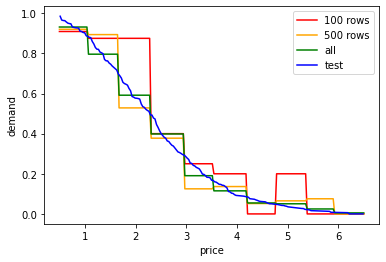

In [422]:
plt.plot(prices_to_predict, my_pred1, color = 'red')
plt.plot(prices_to_predict, my_pred2, color = 'orange')
plt.plot(prices_to_predict, my_pred3, color = 'green')
plt.plot(test_demand_curve['Price_bin_mid'], test_demand_curve['Demand_at_price'], color = 'blue')
plt.xlabel('price')
plt.ylabel('demand')
plt.legend(['100 rows', '500 rows', 'all', 'test'])
plt.show()

In [410]:
test_demand_curve.head()

,Price_bin,Demand_at_price,Price_bin_left,Price_bin_right,Price_bin_mid
0,"(0.5, 0.53]",0.985075,0.500,0.530,0.5150
1,"(0.53, 0.56]",0.966102,0.530,0.560,0.5450
2,"(0.56, 0.59]",0.963768,0.560,0.590,0.5750
3,"(0.59, 0.621]",0.963235,0.590,0.621,0.6055
4,"(0.621, 0.651]",0.956522,0.621,0.651,0.6360


<font color='blue'> Do the same plot, except now you're using 50 bins for each of the three data frames.

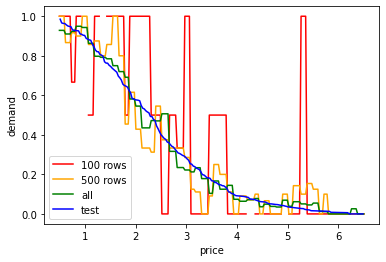

In [317]:
df1 = create_empirical_estimate_demand_df(df_train[0:100], 50)
df2 = create_empirical_estimate_demand_df(df_train[0:500], 50)
df3 = create_empirical_estimate_demand_df(df_train, 50)

my_pred1 = []
my_pred2 = []
my_pred3 = []

for p in prices_to_predict:
    my_pred1.append(get_prediction_empirical(df1, p))
    my_pred2.append(get_prediction_empirical(df2, p))
    my_pred3.append(get_prediction_empirical(df3, p))
    
plt.plot(prices_to_predict, my_pred1, color = 'red')
plt.plot(prices_to_predict, my_pred2, color = 'orange')
plt.plot(prices_to_predict, my_pred3, color = 'green')
plt.plot(test_demand_curve['Price_bin_mid'], test_demand_curve['Demand_at_price'], color = 'blue')
plt.xlabel('price')
plt.ylabel('demand')
plt.legend(['100 rows', '500 rows', 'all', 'test'])
plt.show()

<font color='blue'> Comment on your output in no more than 3 sentences. What is the effect of using more data and more bins?

If we use more data associates with more bins, our prediction is going to be more close to the true demand curve. However, if we use a small amount of data and a large number of bins, our prediction will flactuate a lot and become inaccurate because there are only a little samples are in each bin.

### 1b) Demand estimation using logistic regression

<font color='blue'> First, Fill in the below function that fits a logistic regression to predict the probability of purchase at a price ($d(p)$). The logistic regression should just have two coefficients: one for the intercept, and one for the price. The function takes in a dataframe that you will use as your training data for your model, and should return your fitted model. 

In [332]:
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing

In [333]:
def fit_logistic_regression_demand_just_on_price(df):
    X = df['Offered price']
    Y = df['Purchased']
    X = np.array(X).reshape(-1, 1)
    model = LogisticRegression(fit_intercept=True)
    model.fit(X, Y)
    
    return model

In [334]:
np.where(df_train['Purchased']==True,1,0)

array([0, 1, 1, ..., 1, 0, 0])

In [335]:
df_train.head()

,Location,Income,Offered price,Purchased,bin_with_10_bins,is_America,wealth_status
0,Africa,10.38,3.16,False,"(2.95, 3.54]",0,1
1,Europe,26.33,3.47,True,"(2.95, 3.54]",0,1
2,Europe,24.06,3.78,True,"(3.54, 4.19]",0,1
3,Africa,16.18,3.74,False,"(3.54, 4.19]",0,1
4,Asia Pacific,13.73,4.75,False,"(4.19, 4.77]",0,1


In [336]:
scaler = preprocessing.MinMaxScaler(feature_range=(-1,1))

df_scaled = scaler.fit_transform(df_train[['Offered price','Income']])

In [337]:
df_scaled

array([[-0.11333333, -0.81018777],
       [-0.01      , -0.51366425],
       [ 0.09333333, -0.5558654 ],
       ...,
       [-0.69333333, -0.73824131],
       [ 0.85666667, -0.2664064 ],
       [-0.1       , -0.93344488]])

<font color='blue'> Fill in the below function, that takes in a single price and your trained model and outputs the prediction for the demand $d(p)$ at that price.

Note that you do not want to treat logistic regression as a binary classifier that outputs either 0 or 1. Rather, you want to get the probability of being a 1. You can extract this using the predict_proba(X) function. 

In [338]:
def get_prediction_logistic(fitted_model, price):
    price = np.array(price).reshape(-1,1)
    prediction = fitted_model.predict_proba(price)
    
    prediction = pd.DataFrame(prediction)[1]
    return prediction

<font color='blue'> For each of the three training dataframes as in part A, fit a model and get the predictions for each of the prices in `prices_to_predict` using your above function. Generate the same lineplot as above. Also include the "true" test-time demand curve, `test_demand_curve`. 

In [339]:
df1 = df_train[0:100]
df2 = df_train[0:500]
df3 = df_train.copy()

model1 = fit_logistic_regression_demand_just_on_price(df1)
model2 = fit_logistic_regression_demand_just_on_price(df2)
model3 = fit_logistic_regression_demand_just_on_price(df3)

prediction1 = get_prediction_logistic(model1, prices_to_predict)
prediction2 = get_prediction_logistic(model2, prices_to_predict)
prediction3 = get_prediction_logistic(model3, prices_to_predict)

prediction1
prediction2
prediction3

0      0.923410
1      0.920484
2      0.917457
3      0.914325
4      0.911086
         ...   
195    0.004324
196    0.004152
197    0.003987
198    0.003829
199    0.003677
Name: 1, Length: 200, dtype: float64

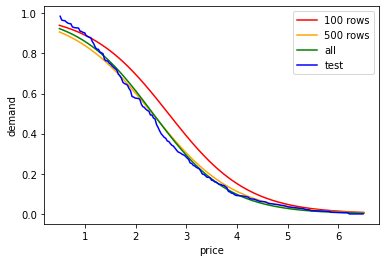

In [340]:
plt.plot(prices_to_predict, pd.DataFrame(prediction1), color = 'red')
plt.plot(prices_to_predict, prediction2, color = 'orange')
plt.plot(prices_to_predict, prediction3, color = 'green')
plt.plot(test_demand_curve['Price_bin_mid'], test_demand_curve['Demand_at_price'], color = 'blue')
plt.xlabel('price')
plt.ylabel('demand')
plt.legend(['100 rows', '500 rows', 'all', 'test'])
plt.show()

In [341]:
prediction1[0]

0.9396783939710353

<font color='blue'> Comment on your output in no more than 3 sentences. What is the effect of using logistic regression instead of the empirical distribution? 

Logistic regression gives us a more smooth curve than using empirical distribution. Also, it avoids predictions that with higher demand for higher price as the curve is monotonically decreasing.

### 1c) Optimal pricing using your demand estimates

<font color='blue'> Fill in the following function that takes in two lists: a list of prices, and a list of predicted demand d(p) at that price. The function outputs the revenue maximizing price given the data and the corresponding revenue. You may use a "brute force" technique, that loops through all the possible prices and calculates the revenue using that price. 

In [342]:
def get_revenue_maximizing_price_and_revenue(price_options, demand_predictions):
    all_revenue = []
    for i in range(len(price_options)):
        all_revenue.append(price_options[i]*demand_predictions[i])
    max_index = np.argmax(all_revenue)
    
    return price_options[max_index], all_revenue[max_index]

<font color='blue'> Print out the optimal price and the predicted optimal revenue from the predictions for your naive and logistic models, using 100 rows and all the data, each. 

For example, we got the following (your numbers may differ slightly):

logistic, 100 points:  2.580402010050251 1.2143341610705582

naive, all points:  2.278894472361809 1.348157868550674

In [343]:
# logistic 100 points
train = df_train[0:100]
model_log_100 = fit_logistic_regression_demand_just_on_price(train)
prediction_log_100 = get_prediction_logistic(model_log_100, prices_to_predict)

best_rev_log100 = get_revenue_maximizing_price_and_revenue(prices_to_predict, prediction_log_100)
best_rev_log100

(2.1884422110552766, 1.4070878495510661)

In [344]:
# logistic all points
train = df_train.copy()
model_log_100 = fit_logistic_regression_demand_just_on_price(train)
prediction_log_100 = get_prediction_logistic(model_log_100, prices_to_predict)

best_rev_logAll = get_revenue_maximizing_price_and_revenue(prices_to_predict, prediction_log_100)
best_rev_logAll

(1.9773869346733668, 1.2295480454251977)

In [423]:
# naive 100 points
train = df_train[0:100]
df1 = create_empirical_estimate_demand_df(train, 10)

my_pred1 = []

for p in prices_to_predict:
    my_pred1.append(get_prediction_empirical(df1, p))
    
best_rev_naive100 = get_revenue_maximizing_price_and_revenue(prices_to_predict, my_pred1)
best_rev_naive100

(2.278894472361809, 1.9940326633165828)

In [346]:
# naive all points
train = df_train.copy()
df1 = create_empirical_estimate_demand_df(train, 10)

my_pred1 = []

for p in prices_to_predict:
    my_pred1.append(get_prediction_empirical(df1, p))
    
best_rev_naiveAll = get_revenue_maximizing_price_and_revenue(prices_to_predict, my_pred1)
best_rev_naiveAll

(2.278894472361809, 1.348157868550674)

<font color='blue'> Now, we're going to use the "true" test-time demand curve, `test_demand_curve`. For each of the above predicted optimal prices, calculate the revenue resulting from that price used on the true demand curve. Also print out the true optimal price and corresponding revenue for that curve.  

For example, we got:

true revenue using logistic 100 price:  0.9729384628058323

In [347]:
test_demand_curve.head()

,Price_bin,Demand_at_price,Price_bin_left,Price_bin_right,Price_bin_mid
0,"(0.5, 0.53]",0.985075,0.500,0.530,0.5150
1,"(0.53, 0.56]",0.966102,0.530,0.560,0.5450
2,"(0.56, 0.59]",0.963768,0.560,0.590,0.5750
3,"(0.59, 0.621]",0.963235,0.590,0.621,0.6055
4,"(0.621, 0.651]",0.956522,0.621,0.651,0.6360


In [348]:
# logistic 100 points
price = best_rev_log100[0]
true_best_rev = 0
for i in range(len(test_demand_curve)):
    if price > test_demand_curve['Price_bin_left'][i] and price <= test_demand_curve['Price_bin_right'][i]:
        true_best_rev = price*test_demand_curve['Demand_at_price'][i]
print('true revenue using logistic 100 price:', true_best_rev)

true revenue using logistic 100 price: 1.141795936202753


In [349]:
# logistic all points
price = best_rev_logAll[0]
true_best_rev = 0
for i in range(len(test_demand_curve)):
    if price > test_demand_curve['Price_bin_left'][i] and price <= test_demand_curve['Price_bin_right'][i]:
        true_best_rev = price*test_demand_curve['Demand_at_price'][i]
print('true revenue using logistic all price:', true_best_rev)

true revenue using logistic all price: 1.1413105797443595


In [350]:
# naive 100 points
price = best_rev_naive100[0]
true_best_rev = 0
for i in range(len(test_demand_curve)):
    if price > test_demand_curve['Price_bin_left'][i] and price <= test_demand_curve['Price_bin_right'][i]:
        true_best_rev = price*test_demand_curve['Demand_at_price'][i]
print('true revenue using naive 100 price:', true_best_rev)

true revenue using naive 100 price: 1.1655414476964976


In [351]:
# naive all points
price = best_rev_naiveAll[0]
true_best_rev = 0
for i in range(len(test_demand_curve)):
    if price > test_demand_curve['Price_bin_left'][i] and price <= test_demand_curve['Price_bin_right'][i]:
        true_best_rev = price*test_demand_curve['Demand_at_price'][i]
print('true revenue using naive all price:', true_best_rev)

true revenue using naive all price: 1.1655414476964976


In [352]:
best_rev_true = get_revenue_maximizing_price_and_revenue(test_demand_curve['Price_bin_mid'], test_demand_curve['Demand_at_price'])
best_rev_true

(2.083, 1.1922434210526316)

<font color='blue'> How do your estimates compare to the actual revenue? Discuss in no more than 3 sentences. 

Our estimates do not reach the true optimal revenue, but all of them are pretty close to the true optimal. Naive method out perform logistic regression by a little.

# Problem 2: Demand estimation and pricing with covariates 

Now, we are going to ask you to do personalized pricing, based on just a two binarized covariates. 

First, take `df_train` and create a new column for "low" and "high" wealth, based on if the income level is above or below the median income level. Second, create a new column for Location: `1` if the location is either America, and `0` if the location is anything else.

For this section, we will use all the df_train data, as opposed to just the first few rows.

In [353]:
df_train['is_America'] = np.where(df_train['Location']=='America', 1, 0)
df_train['wealth_status'] = np.where(df_train['Income']>= np.median(df_train['Income']), 1, 0)

In [354]:
df_train.head()

,Location,Income,Offered price,Purchased,bin_with_10_bins,is_America,wealth_status
0,Africa,10.38,3.16,False,"(2.95, 3.54]",0,1
1,Europe,26.33,3.47,True,"(2.95, 3.54]",0,1
2,Europe,24.06,3.78,True,"(3.54, 4.19]",0,1
3,Africa,16.18,3.74,False,"(3.54, 4.19]",0,1
4,Asia Pacific,13.73,4.75,False,"(4.19, 4.77]",0,1


In [355]:
np.median(df_train['Income'])

10.34

### 2a) Demand estimation

<font color='blue'> First, Fill in the below function that fits a logistic regression to predict the probability of purchase at a price ($d(p)$). The logistic regression should now have more coefficients than before: 1 for each covariate, and any interactions (including interactions between price and covariates) that you wish to add. If you add more interactions, you may wish to add regularization. 

In [356]:
df_train.head()

,Location,Income,Offered price,Purchased,bin_with_10_bins,is_America,wealth_status
0,Africa,10.38,3.16,False,"(2.95, 3.54]",0,1
1,Europe,26.33,3.47,True,"(2.95, 3.54]",0,1
2,Europe,24.06,3.78,True,"(3.54, 4.19]",0,1
3,Africa,16.18,3.74,False,"(3.54, 4.19]",0,1
4,Asia Pacific,13.73,4.75,False,"(4.19, 4.77]",0,1


In [357]:
def fit_logistic_regression_demand_with_covariates(df):
    df1 = df.copy()
    X = df1[['Offered price', 'is_America', 'wealth_status']]
    Y = df1['Purchased']
    #X = np.array(X).reshape(-1, 1)
    model = LogisticRegression(fit_intercept=True)
    model.fit(X, Y)
    
    return model

<font color='blue'> Fill in the below function, that takes in a single price, covariates, and your trained model, and outputs the prediction for the demand $d(p)$ at that price. For example, one of the covariate inputs to the function can be `['NotAmerica', 'LowWealth']`.

In [358]:
def get_prediction_logistic(fitted_model, price, covariates):
    #price = np.array(price).reshape(-1,1)
    my_x = [[p, covariates[0], covariates[1]] for p in price]
    prediction = fitted_model.predict_proba(my_x)
    
    prediction = pd.DataFrame(prediction)[1]
    return prediction

In [359]:
test_demand_curve_America_HighWealth = pd.read_csv('test_demand_America_HighWealth.csv')
test_demand_curve_NotAmerica_HighWealth = pd.read_csv('test_demand_NotAmerica_HighWealth.csv')
test_demand_curve_America_LowWealth = pd.read_csv('test_demand_America_LowWealth.csv')
test_demand_curve_NotAmerica_LowWealth = pd.read_csv('test_demand_NotAmerica_LowWealth.csv')

<font color='blue'> Fit a model and get the predictions for each of the prices in `prices_to_predict` using your above function and each unique covariate combination.

For example, `test_demand_NotAmerica_LowWealth`, we got:

Group Not America, Low Wealth: Optimal price 1.314070, Revenue 0.913284, True revenue 0.788442


<font color='blue'> For each covariate combination, generate the same lineplot as in 1a and 1b (separately for each covariate combination). Also include the "true" test-time demand curve for the appropriate covariate combination 


In [360]:
# Not America Low Wealth points
train = df_train.copy()
model_log = fit_logistic_regression_demand_with_covariates(train)
prediction_log_notA_lowW = get_prediction_logistic(model_log, prices_to_predict, [0,0])

best_rev_log_notA_lowW = get_revenue_maximizing_price_and_revenue(prices_to_predict, prediction_log_notA_lowW)
best_rev_log_notA_lowW

(1.2537688442211055, 0.7346870013657666)

In [361]:
# logistic all points
price = best_rev_log_notA_lowW[0]
true_best_rev = 0
for i in range(len(test_demand_curve_NotAmerica_LowWealth)):
    if price > test_demand_curve_NotAmerica_LowWealth['Price_bin_left'][i] and price <= test_demand_curve_NotAmerica_LowWealth['Price_bin_right'][i]:
        true_best_rev = price*test_demand_curve_NotAmerica_LowWealth['Demand_at_price'][i]
print('true revenue using logistic all price:', true_best_rev)

true revenue using logistic all price: 0.8059942569992822


In [362]:
test_demand_curve_NotAmerica_LowWealth.head()

,Price_bin,Demand_at_price,Price_bin_left,Price_bin_right,Price_bin_mid
0,"(0.5, 0.53]",0.969231,0.500,0.530,0.5150
1,"(0.53, 0.56]",0.926471,0.530,0.560,0.5450
2,"(0.56, 0.59]",0.924528,0.560,0.590,0.5750
3,"(0.59, 0.621]",0.906977,0.590,0.621,0.6055
4,"(0.621, 0.651]",0.901408,0.621,0.651,0.6360


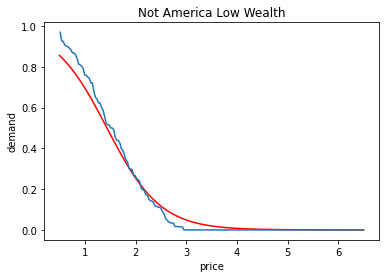

In [363]:
plt.plot(prices_to_predict, prediction_log_notA_lowW, color='red')
plt.plot(test_demand_curve_NotAmerica_LowWealth['Price_bin_mid'], test_demand_curve_NotAmerica_LowWealth['Demand_at_price'])
plt.xlabel('price')
plt.ylabel('demand')
plt.title('Not America Low Wealth')
plt.show()

Group America, Low Wealth: Optimal price and Revenue are: (1.7060301507537687, 1.1685625179462906)
true revenue using logistic all price: 1.0236180904522612


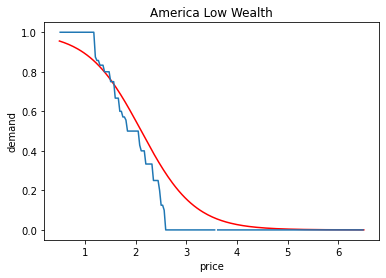

In [364]:
# America Low Wealth points
train = df_train.copy()
model_log = fit_logistic_regression_demand_with_covariates(train)
prediction_log_A_lowW = get_prediction_logistic(model_log, prices_to_predict, [1,0])

best_rev_log_A_lowW = get_revenue_maximizing_price_and_revenue(prices_to_predict, prediction_log_A_lowW)
print('Group America, Low Wealth: Optimal price and Revenue are:',best_rev_log_A_lowW)

# logistic all points
price = best_rev_log_A_lowW[0]
true_best_rev = 0
for i in range(len(test_demand_curve_America_LowWealth)):
    if price > test_demand_curve_America_LowWealth['Price_bin_left'][i] and price <= test_demand_curve_America_LowWealth['Price_bin_right'][i]:
        true_best_rev = price*test_demand_curve_America_LowWealth['Demand_at_price'][i]
print('true revenue using logistic all price:', true_best_rev)

plt.plot(prices_to_predict, prediction_log_A_lowW, color='red')
plt.plot(test_demand_curve_America_LowWealth['Price_bin_mid'], test_demand_curve_America_LowWealth['Demand_at_price'])
plt.xlabel('price')
plt.ylabel('demand')
plt.title('America Low Wealth')
plt.show()

Group Not America, High Wealth: Optimal price and Revenue are: (2.42964824120603, 1.8972428666515946)
true revenue using logistic all price: 1.8093125200470437


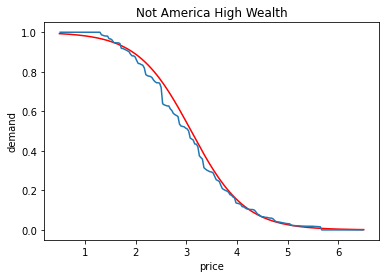

In [365]:
# Not America High Wealth points
train = df_train.copy()
model_log = fit_logistic_regression_demand_with_covariates(train)
prediction_log_notA_highW = get_prediction_logistic(model_log, prices_to_predict, [0,1])

best_rev_log_notA_highW = get_revenue_maximizing_price_and_revenue(prices_to_predict, prediction_log_notA_highW)
print('Group Not America, High Wealth: Optimal price and Revenue are:',best_rev_log_notA_highW)

# logistic all points
price = best_rev_log_notA_highW[0]
true_best_rev = 0
for i in range(len(test_demand_curve_NotAmerica_HighWealth)):
    if price > test_demand_curve_NotAmerica_HighWealth['Price_bin_left'][i] and price <= test_demand_curve_NotAmerica_HighWealth['Price_bin_right'][i]:
        true_best_rev = price*test_demand_curve_NotAmerica_HighWealth['Demand_at_price'][i]
print('true revenue using logistic all price:', true_best_rev)

plt.plot(prices_to_predict, prediction_log_notA_highW, color='red')
plt.plot(test_demand_curve_NotAmerica_HighWealth['Price_bin_mid'], test_demand_curve_NotAmerica_HighWealth['Demand_at_price'])
plt.xlabel('price')
plt.ylabel('demand')
plt.title('Not America High Wealth')
plt.show()

Group America, High Wealth: Optimal price and Revenue are: (2.972361809045226, 2.442468257720609)
true revenue using logistic all price: 2.1231155778894473


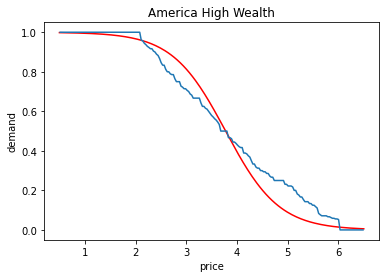

In [366]:
# America High Wealth points
train = df_train.copy()
model_log = fit_logistic_regression_demand_with_covariates(train)
prediction_log_A_highW = get_prediction_logistic(model_log, prices_to_predict, [1,1])

best_rev_log_A_highW = get_revenue_maximizing_price_and_revenue(prices_to_predict, prediction_log_A_highW)
print('Group America, High Wealth: Optimal price and Revenue are:',best_rev_log_A_highW)

# logistic all points
price = best_rev_log_A_highW[0]
true_best_rev = 0
for i in range(len(test_demand_curve_America_HighWealth)):
    if price > test_demand_curve_America_HighWealth['Price_bin_left'][i] and price <= test_demand_curve_America_HighWealth['Price_bin_right'][i]:
        true_best_rev = price*test_demand_curve_America_HighWealth['Demand_at_price'][i]
print('true revenue using logistic all price:', true_best_rev)

plt.plot(prices_to_predict, prediction_log_A_highW, color='red')
plt.plot(test_demand_curve_America_HighWealth['Price_bin_mid'], test_demand_curve_America_HighWealth['Demand_at_price'])
plt.xlabel('price')
plt.ylabel('demand')
plt.title('America High Wealth')
plt.show()

### 2b) Pricing

<font color='blue'> Now, use your code from 1c to output predicted optimal prices, predicted revenue, and and actual revenue using the test data curve, for each covariate combination. 

In [395]:
# Not America Low Wealth points
train = df_train.copy()
model_log = fit_logistic_regression_demand_with_covariates(train)
prediction_log_notA_lowW = get_prediction_logistic(model_log, prices_to_predict, [0,0])

best_rev_log_notA_lowW = get_revenue_maximizing_price_and_revenue(prices_to_predict, prediction_log_notA_lowW)
print('Group Not America, Low Wealth: Optimal price and Revenue are:',best_rev_log_notA_lowW)

# logistic all points
price = best_rev_log_notA_lowW[0]
true_best_rev0 = 0
for i in range(len(test_demand_curve_NotAmerica_LowWealth)):
    if price > test_demand_curve_NotAmerica_LowWealth['Price_bin_left'][i] and price <= test_demand_curve_NotAmerica_LowWealth['Price_bin_right'][i]:
        true_best_rev0 = price*test_demand_curve_NotAmerica_LowWealth['Demand_at_price'][i]
print('true revenue using logistic all price:', true_best_rev0)

Group Not America, Low Wealth: Optimal price and Revenue are: (1.2537688442211055, 0.7346870013657666)
true revenue using logistic all price: 0.8059942569992822


In [389]:
# America Low Wealth points
train = df_train.copy()
model_log = fit_logistic_regression_demand_with_covariates(train)
prediction_log_A_lowW = get_prediction_logistic(model_log, prices_to_predict, [1,0])

best_rev_log_A_lowW = get_revenue_maximizing_price_and_revenue(prices_to_predict, prediction_log_A_lowW)
print('Group America, Low Wealth: Optimal price and Revenue are:',best_rev_log_A_lowW)

# logistic all points
price = best_rev_log_A_lowW[0]
true_best_rev1 = 0
for i in range(len(test_demand_curve_America_LowWealth)):
    if price > test_demand_curve_America_LowWealth['Price_bin_left'][i] and price <= test_demand_curve_America_LowWealth['Price_bin_right'][i]:
        true_best_rev1 = price*test_demand_curve_America_LowWealth['Demand_at_price'][i]
print('true revenue using logistic all price:', true_best_rev1)

Group America, Low Wealth: Optimal price and Revenue are: (1.7060301507537687, 1.1685625179462906)
true revenue using logistic all price: 1.0236180904522612


In [390]:
# Not America High Wealth points
train = df_train.copy()
model_log = fit_logistic_regression_demand_with_covariates(train)
prediction_log_notA_highW = get_prediction_logistic(model_log, prices_to_predict, [0,1])

best_rev_log_notA_highW = get_revenue_maximizing_price_and_revenue(prices_to_predict, prediction_log_notA_highW)
print('Group Not America, High Wealth: Optimal price and Revenue are:',best_rev_log_notA_highW)

# logistic all points
price = best_rev_log_notA_highW[0]
true_best_rev2 = 0
for i in range(len(test_demand_curve_NotAmerica_HighWealth)):
    if price > test_demand_curve_NotAmerica_HighWealth['Price_bin_left'][i] and price <= test_demand_curve_NotAmerica_HighWealth['Price_bin_right'][i]:
        true_best_rev2 = price*test_demand_curve_NotAmerica_HighWealth['Demand_at_price'][i]
print('true revenue using logistic all price:', true_best_rev2)

Group Not America, High Wealth: Optimal price and Revenue are: (2.42964824120603, 1.8972428666515946)
true revenue using logistic all price: 1.8093125200470437


In [391]:
# America High Wealth points
train = df_train.copy()
model_log = fit_logistic_regression_demand_with_covariates(train)
prediction_log_A_highW = get_prediction_logistic(model_log, prices_to_predict, [1,1])

best_rev_log_A_highW = get_revenue_maximizing_price_and_revenue(prices_to_predict, prediction_log_A_highW)
print('Group America, High Wealth: Optimal price and Revenue are:',best_rev_log_A_highW)

# logistic all points
price = best_rev_log_A_highW[0]
true_best_rev3 = 0
for i in range(len(test_demand_curve_America_HighWealth)):
    if price > test_demand_curve_America_HighWealth['Price_bin_left'][i] and price <= test_demand_curve_America_HighWealth['Price_bin_right'][i]:
        true_best_rev3 = price*test_demand_curve_America_HighWealth['Demand_at_price'][i]
print('true revenue using logistic all price:', true_best_rev3)

Group America, High Wealth: Optimal price and Revenue are: (2.972361809045226, 2.442468257720609)
true revenue using logistic all price: 2.1231155778894473


<font color='blue'> Suppose each of the 4 covariate combinations make up an equal part of the population. What would be the resulting revenue achieved at test time if you use the optimal price for each group (so you look at their covariates, and then give them the optimal price for that group).

In [394]:
actual_revenue = 1/4*(true_best_rev0+true_best_rev1+true_best_rev2+true_best_rev3)
print('Actual revenue is:',actual_revenue)

Actual revenue is: 1.4405101113470087


In [392]:
#test_demand_curve[100:150]

<font color='blue'> Comment on your outputs in no more than 3 sentences. What is the effect of using different prices for differerent covariate groups?

We can see that using different prices for differerent covariate groups, we get a higher test revenue compared to our models using simple naive and logistic regressions. Using different prices for differerent covariate groups will allow us to reach a higher revenue.

# Problem 3: Pricing under capacity constraints

Now, we are going to build up to implementing the Bellman equation approach discussed in class, to price a single copy of an item to be sold over $T$ time periods. For simplicity, we will use `test_demand_curve` as $d(p)$. 

In [271]:
price_options = list(test_demand_curve.Price_bin_mid)
demand_predictions = list(test_demand_curve.Demand_at_price)

### 3a) Implementing one step of the Bellman equation

Recall the "Bellman equation" taught in class. Suppose we have 1 copy of the item at time $t$. Then, my expected revenue given I price the item at $p_t$ is:
$$ V_t = d(p_t)p_t + (1 - d(p_t))V_{t+1}$$

<font color='blue'> Implement the following function that returns optimal price $p_t$ and the resulting value $V_t$, given the demand curve and $V_{t+1}$. 

For example, we find that the output of the following function call is: (2.083, 1.1922434210526316)

`get_single_step_revenue_maximizing_price_and_revenue(0, price_options, demand_predictions)`

In [269]:
def get_single_step_revenue_maximizing_price_and_revenue(Vtplus1, price_options, demand_predictions):
    Vt = []
    for i in range(len(price_options)):
        vt = demand_predictions[i]*price_options[i]+(1-demand_predictions[i])*Vtplus1
        Vt.append(vt)
    max_index = np.argmax(Vt)
    
    return price_options[max_index], Vt[max_index]

In [272]:
get_single_step_revenue_maximizing_price_and_revenue(0, price_options, demand_predictions)

(2.083, 1.1922434210526316)

### 3b) Calculating prices over time


<font color='blue'> Implement the following function that returns a list (of length $T$) of optimal prices for each time period, and a expected revenue number for those prices.
    
Hint: your function should loop through each time step, _starting_ at time $t=T-1$ (the last time period, since the first time period is time $t=0$). Each iteration of the loop should call the function from part 3a. Recall that we can define $V_T = 0$, since even if the item is unsold at time $T$, we have finished trying to sell it.

In [291]:
def get_prices_over_time_and_expected_revenue(prices, demand_predictions, T):
    T_lst = reversed(range(T))
    vt = 0
    prices = []
    values = []
    for i in range(T):
        opt = get_single_step_revenue_maximizing_price_and_revenue(vt, price_options, demand_predictions)
        prices.append(opt[0])
        values.append(opt[1])
        vt = opt[1]
    prices.reverse()
    
    return prices, values

In [292]:
prices = get_prices_over_time_and_expected_revenue(price_options, demand_predictions, 100)

In [295]:
print(prices[0][0],prices[0][90])

5.822 4.224


In [300]:
print(prices[1][99])

5.228684354819154


<font color='blue'> Plot a line plot for your optimal prices over time when $T=100$ and $T=10$. Also print out the expected revenue using these prices and for each $T$. 

For example, when $T=100$, we find that prices[0] = 5.822, prices[90] = 4.224, and that revenue = 5.2287

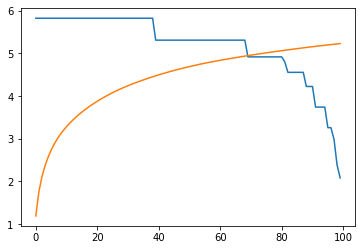

Revenue is 5.228684354819154


In [330]:
plt.plot(range(100),prices[0])
plt.plot(range(100),prices[1])
plt.show()
print("Revenue is", prices[1][99])

In [306]:
prices_10 = get_prices_over_time_and_expected_revenue(price_options, demand_predictions, 10)

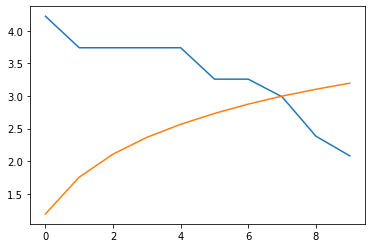

Revenue is 3.1976788395450586


In [329]:
plt.plot(range(10),prices_10[0])
plt.plot(range(10),prices_10[1])
plt.show()
print("Revenue is", prices_10[1][9])

### 3c) [Bonus, 3 points] Prices over time with multiple copies

<font color='blue'> Now, suppose that you have $K$ copies of the item, that you must sell over a time period $T$. Implement the two-dimensional dynamic program as discussed in class. Plot a line plot where the X axis is time as in 3b, but now you have $K$ lines where each line indicates the price at time $T$ if you have $K$ items left. 
    
Hint: As in 3a and 3b, you may find it useful to first optimize the price $p_{t,k}$ given the values $V_{t+1, k}$, $V_{t+1, k-1}$. Then, have a 2nd function that loops through $t, k$ in an appropriate order. 